Ch3 p37

Fit a natural cubic spline to the function in p33, matching to the function at five equally spaced points between -1 and 1. Plot the cubic spline curve and compare it to the plots of the polynomials of p33, particularaly with the 4th degree polynomial.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from naf.incf import csisv

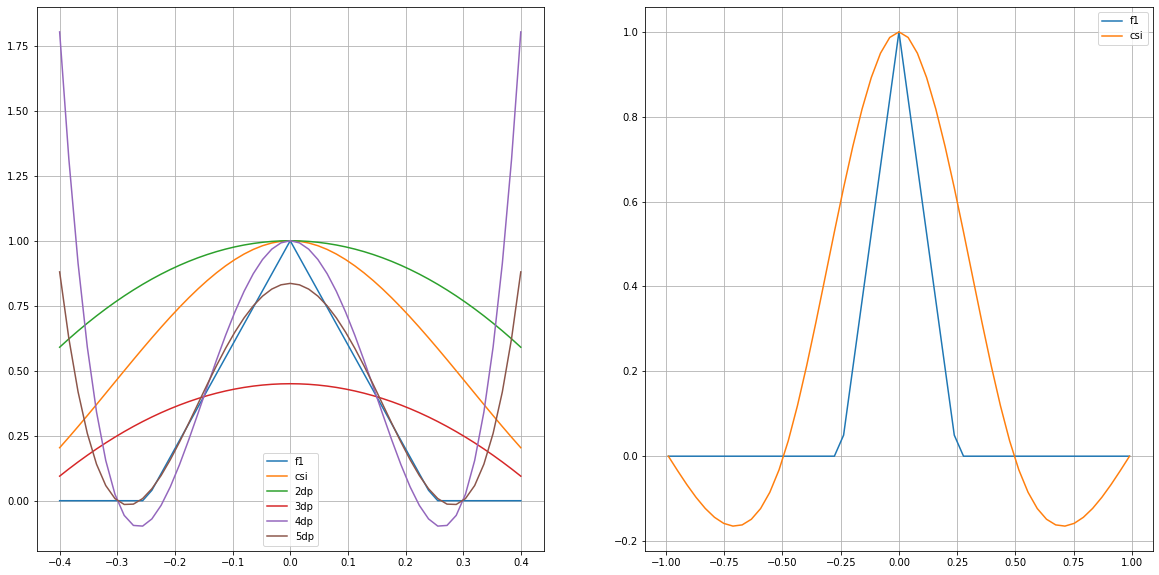

In [22]:
def f1(x):
    if x > -1 and x < -0.25:
        return 0
    if x > -0.25 and x < 0.25:
        return 1 - abs(4*x)
    if x > 0.25 and x < 1:
        return 0

#generating 5 points to match from original equation
x = np.linspace(-0.99, 0.99, 5)
f1y = [f1(i) for i in x]


#range of values for plotting subsequent curves
ivx = np.linspace(-0.40, 0.40, 51)
ivx2 = np.linspace(-0.99, 0.99, 51)

#computing original equation values
f1y2 = [f1(i) for i in ivx]
f1y3 = [f1(i) for i in ivx2]

#computing cubic spline interpolated values
pts = np.column_stack((x,f1y))
ivy = csisv(ivx, pts, 1)
ivy2 = csisv(ivx2, pts, 1)

#computing 2nd deg polynomial values, equation taken from p33
eq2 = lambda z: 1.0 - 2.56*z**2
veq2 = np.vectorize(eq2)
y2 = veq2(ivx)

#computing 3rd deg polynomial values, equation taken from p33
eq3 = lambda z: -2.22222222222222*z**2 + 2.22044604925031e-16*z + 0.45
veq3 = np.vectorize(eq3)
y3 = veq3(ivx)

#computing 4th deg polynomial values, equation taken from p33
eq4 = lambda z: 230.452674897119*z**4 - 31.8518518518519*z**2 - 4.44089209850063e-16*z + 1.0
veq4 = np.vectorize(eq4)
y4 = veq4(ivx)

#computing 5th deg polynomial values, equation taken from p33
eq5 = lambda z: 136.638374485597*z**4 - 21.5856481481482*z**2 - 4.44089209850063e-16*z + 0.8359375
veq5 = np.vectorize(eq5)
y5 = veq5(ivx)


fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].grid()
ax[0].plot(ivx, f1y2, label="f1")
ax[0].plot(ivx, ivy, label="csi")
ax[0].plot(ivx, y2, label="2dp")
ax[0].plot(ivx, y3, label="3dp")
ax[0].plot(ivx, y4, label="4dp")
ax[0].plot(ivx, y5, label="5dp")
ax[0].legend()

ax[1].grid()
ax[1].plot(ivx2, f1y3, label="f1")
ax[1].plot(ivx2, ivy2, label="csi")
ax[1].legend()
plt.show()

The first observation is that the cubic spline doesn't "fly-off" near the ends of the equation, it has a much more controlled appearance. 

The second observation, w.r.t. the 4th degree polynomial, is that the cubic spline and 4th degree polynomial have the same general shape, the same number of roots. I find this to be very interesting and was not obvious to me on first glance, I was expecting them to match more closely. I wonder if the similar shapes has anything to do with the fact they are using the same number of point to generate the curves, in this case 5 points from the original equation. 

I decided to test this idea below with six points from the original equation.

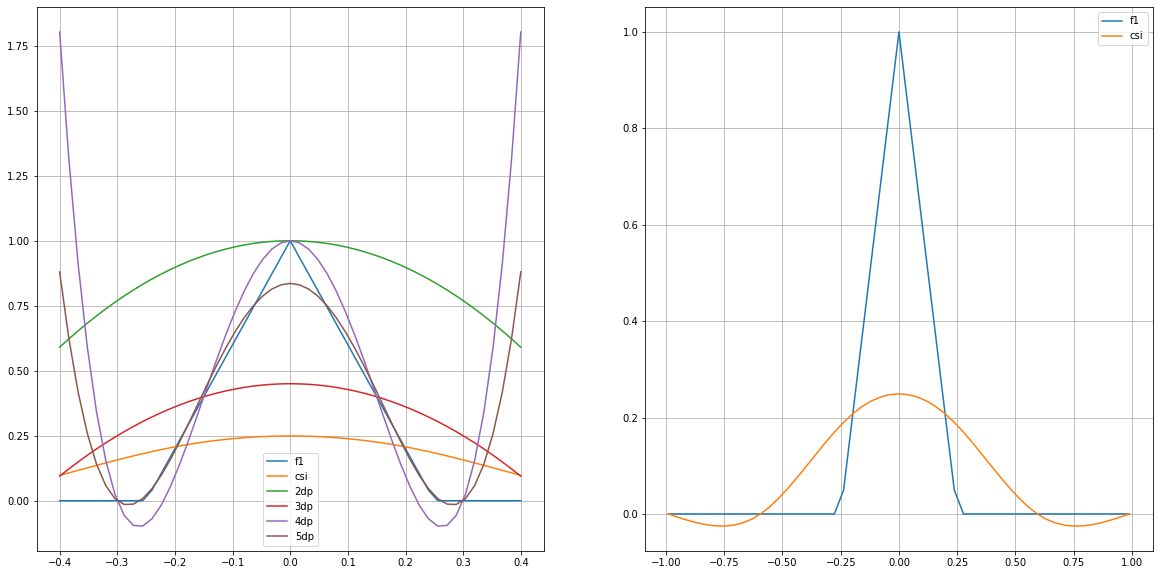

In [23]:
#generating 6 points to match from original equation
x = np.linspace(-0.99, 0.99, 6)
f1y = [f1(i) for i in x]


#range of values for plotting subsequent curves
ivx = np.linspace(-0.40, 0.40, 51)
ivx2 = np.linspace(-0.99, 0.99, 51)

#computing original equation values
f1y2 = [f1(i) for i in ivx]
f1y3 = [f1(i) for i in ivx2]

#computing cubic spline interpolated values
pts = np.column_stack((x,f1y))
ivy = csisv(ivx, pts, 1)
ivy2 = csisv(ivx2, pts, 1)

#computing 2nd deg polynomial values, equation taken from p33
eq2 = lambda z: 1.0 - 2.56*z**2
veq2 = np.vectorize(eq2)
y2 = veq2(ivx)

#computing 3rd deg polynomial values, equation taken from p33
eq3 = lambda z: -2.22222222222222*z**2 + 2.22044604925031e-16*z + 0.45
veq3 = np.vectorize(eq3)
y3 = veq3(ivx)

#computing 4th deg polynomial values, equation taken from p33
eq4 = lambda z: 230.452674897119*z**4 - 31.8518518518519*z**2 - 4.44089209850063e-16*z + 1.0
veq4 = np.vectorize(eq4)
y4 = veq4(ivx)

#computing 5th deg polynomial values, equation taken from p33
eq5 = lambda z: 136.638374485597*z**4 - 21.5856481481482*z**2 - 4.44089209850063e-16*z + 0.8359375
veq5 = np.vectorize(eq5)
y5 = veq5(ivx)


fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].grid()
ax[0].plot(ivx, f1y2, label="f1")
ax[0].plot(ivx, ivy, label="csi")
ax[0].plot(ivx, y2, label="2dp")
ax[0].plot(ivx, y3, label="3dp")
ax[0].plot(ivx, y4, label="4dp")
ax[0].plot(ivx, y5, label="5dp")
ax[0].legend()

ax[1].grid()
ax[1].plot(ivx2, f1y3, label="f1")
ax[1].plot(ivx2, ivy2, label="csi")
ax[1].legend()
plt.show()

And now with 6 points from the original equation the cubic spline matches the general shape of the 5th degree polynomial with 6 roots which now that I think about it makes sense.